In [56]:
import sys
import PIL
# from PIL import Image
import cv2

import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = ['Noto Sans Mono CJK TC'] #By default, matplotlib does NOT show Japanese characters
                                                                                                               #Solution: download Japanese fonts and put it in matplotlib's folder
                                                                                                                #https://albertauyeung.github.io/2020/03/15/matplotlib-cjk-fonts.html
import pyocr
import pyocr.builders #pyocr is just a OCR tool wrapper. In this project, I installed tesseract
                                      #how to install tesseract: https://github.com/tesseract-ocr/tessdoc/blob/master/Home.md

pic_path = "./data/Ministry.jpg" #File credit: https://www.meishishop.net/ministry/images/Ministry10111-600.jpg

# Use Tesseract to recognize Japanese text on a business card

In [57]:
#Get OCR tool
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool available")
    sys.exit(1)
else:
    tool = tools[0] #If nothing else is installed, tesseract is the first and only OCR tool available
#     print(tool)
 
    
#Function that turns an image into strings
def img_to_str (pic_path, lang="jpn", builder_name="LineBoxBuilder"):
    builders = {"LineBoxBuilder": pyocr.builders.LineBoxBuilder()}
    detected = tool.image_to_string(PIL.Image.open(pic_path),
                                                               lang=lang,
                                                               builder=builders[builder_name])
    return detected
    
res_jpn_eng = img_to_str(pic_path, "jpn+eng")
res_eng = img_to_str(pic_path, "eng")
res_jpn = img_to_str(pic_path, "jpn")
res = res_jpn_eng
    
out = cv2.imread(pic_path)

First, check the original image.

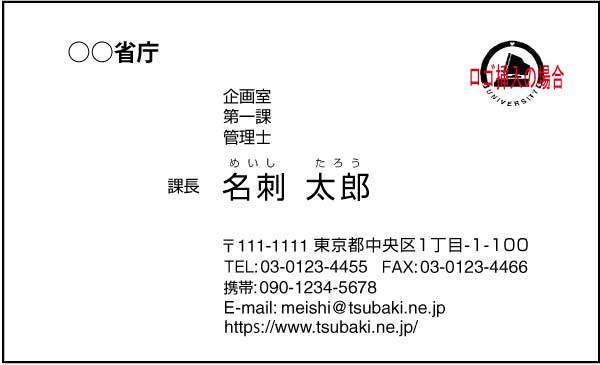

In [58]:
import IPython
IPython.display.Image(filename=pic_path) 

## Line up the recognized text and the detected object to check the results

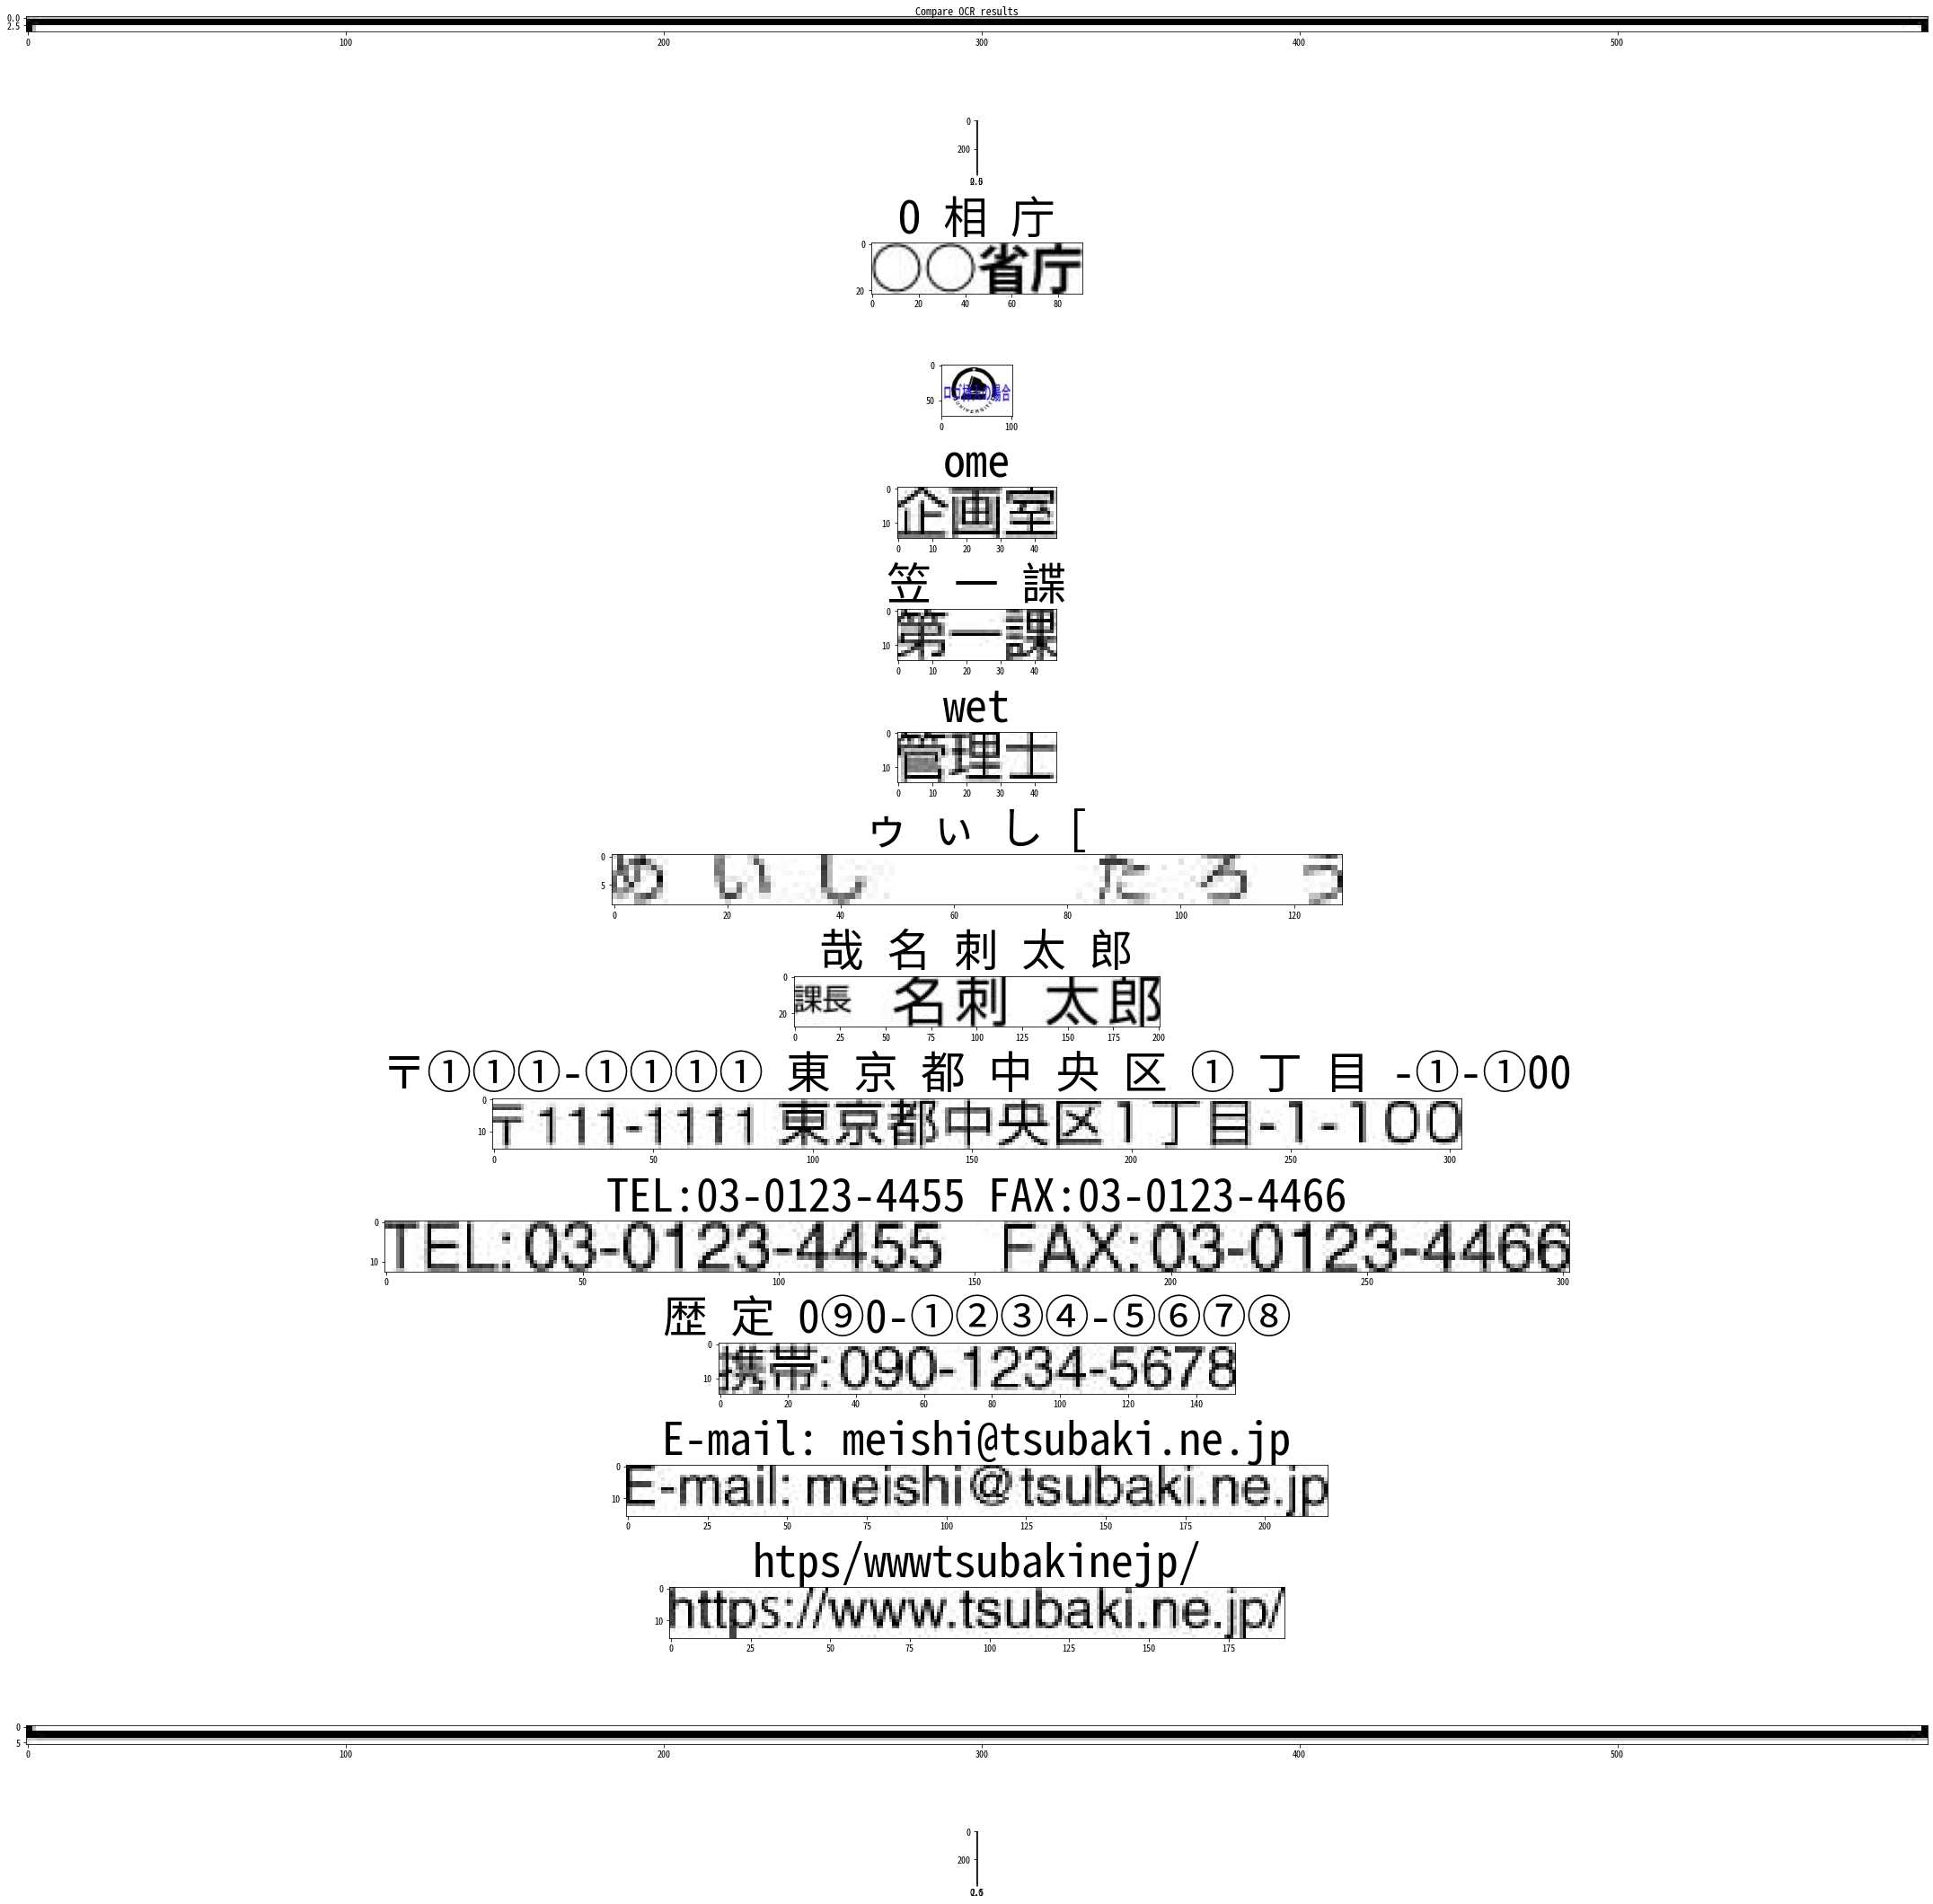

In [60]:
fig, ax = plt.subplots(len(res), figsize=(30,30))
fig.suptitle("Compare OCR results")
for index, d in enumerate(res):
    crop_img = out[d.position[0][1]:d.position[1][1], d.position[0][0]:d.position[1][0]] #U se numpy slicing to crop image: img[y:y+h, x:x+w]
    ax[index].imshow(crop_img)
    ax[index].set_title(d.content, fontsize=50)
    
# plt.show()
plt.tight_layout() #This avoid overlapping of the title and the image

Tesseract doesn't seem to do a very good job. Let's try EasyOCR instead.

# EasyOCR

https://github.com/raylauxes/EasyOCR

In [61]:
import easyocr
reader = easyocr.Reader(['ja','en']) # Need to run only once to load model into memory.
                                                              # It will download the detection model as well as the recognition model.
                                                              # This might take a few minutes.

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [62]:
result = reader.readtext(pic_path)

Let's check what's in the result.

In [63]:
for ele in result:
    print(ele)

([[68, 38], [164, 38], [164, 68], [68, 68]], 'のO省庁', 0.4520505964756012)
([[476, 55], [569, 55], [569, 95], [476, 95]], '婦)駄', 0.003949320875108242)
([[220, 84], [272, 84], [272, 108], [220, 108]], '企画室', 0.8246325254440308)
([[220, 104], [274, 104], [274, 128], [220, 128]], '第一課', 0.9170675277709961)
([[221, 127], [273, 127], [273, 147], [221, 147]], '管理土', 0.7364490032196045)
([[313, 157], [345, 157], [345, 171], [313, 171]], 'たョ', 0.31071802973747253)
([[246, 158], [274, 158], [274, 166], [246, 166]], '一', 0.4975338280200958)
([[215, 167], [375, 167], [375, 207], [215, 207]], '名刺 太郎', 0.8963894248008728)
([[164, 174], [202, 174], [202, 198], [164, 198]], '課長', 0.9972334504127502)
([[220, 232], [532, 232], [532, 256], [220, 256]], 'テ111-1111東京都中央区1丁目-1-10', 0.5425834059715271)
([[220, 254], [372, 254], [372, 278], [220, 278]], '7EL:03-0123-4455', 0.3082767128944397)
([[378, 254], [532, 254], [532, 278], [378, 278]], 'FAX:03-0123-4466', 0.6577692627906799)
([[221, 277], [379, 277], [3

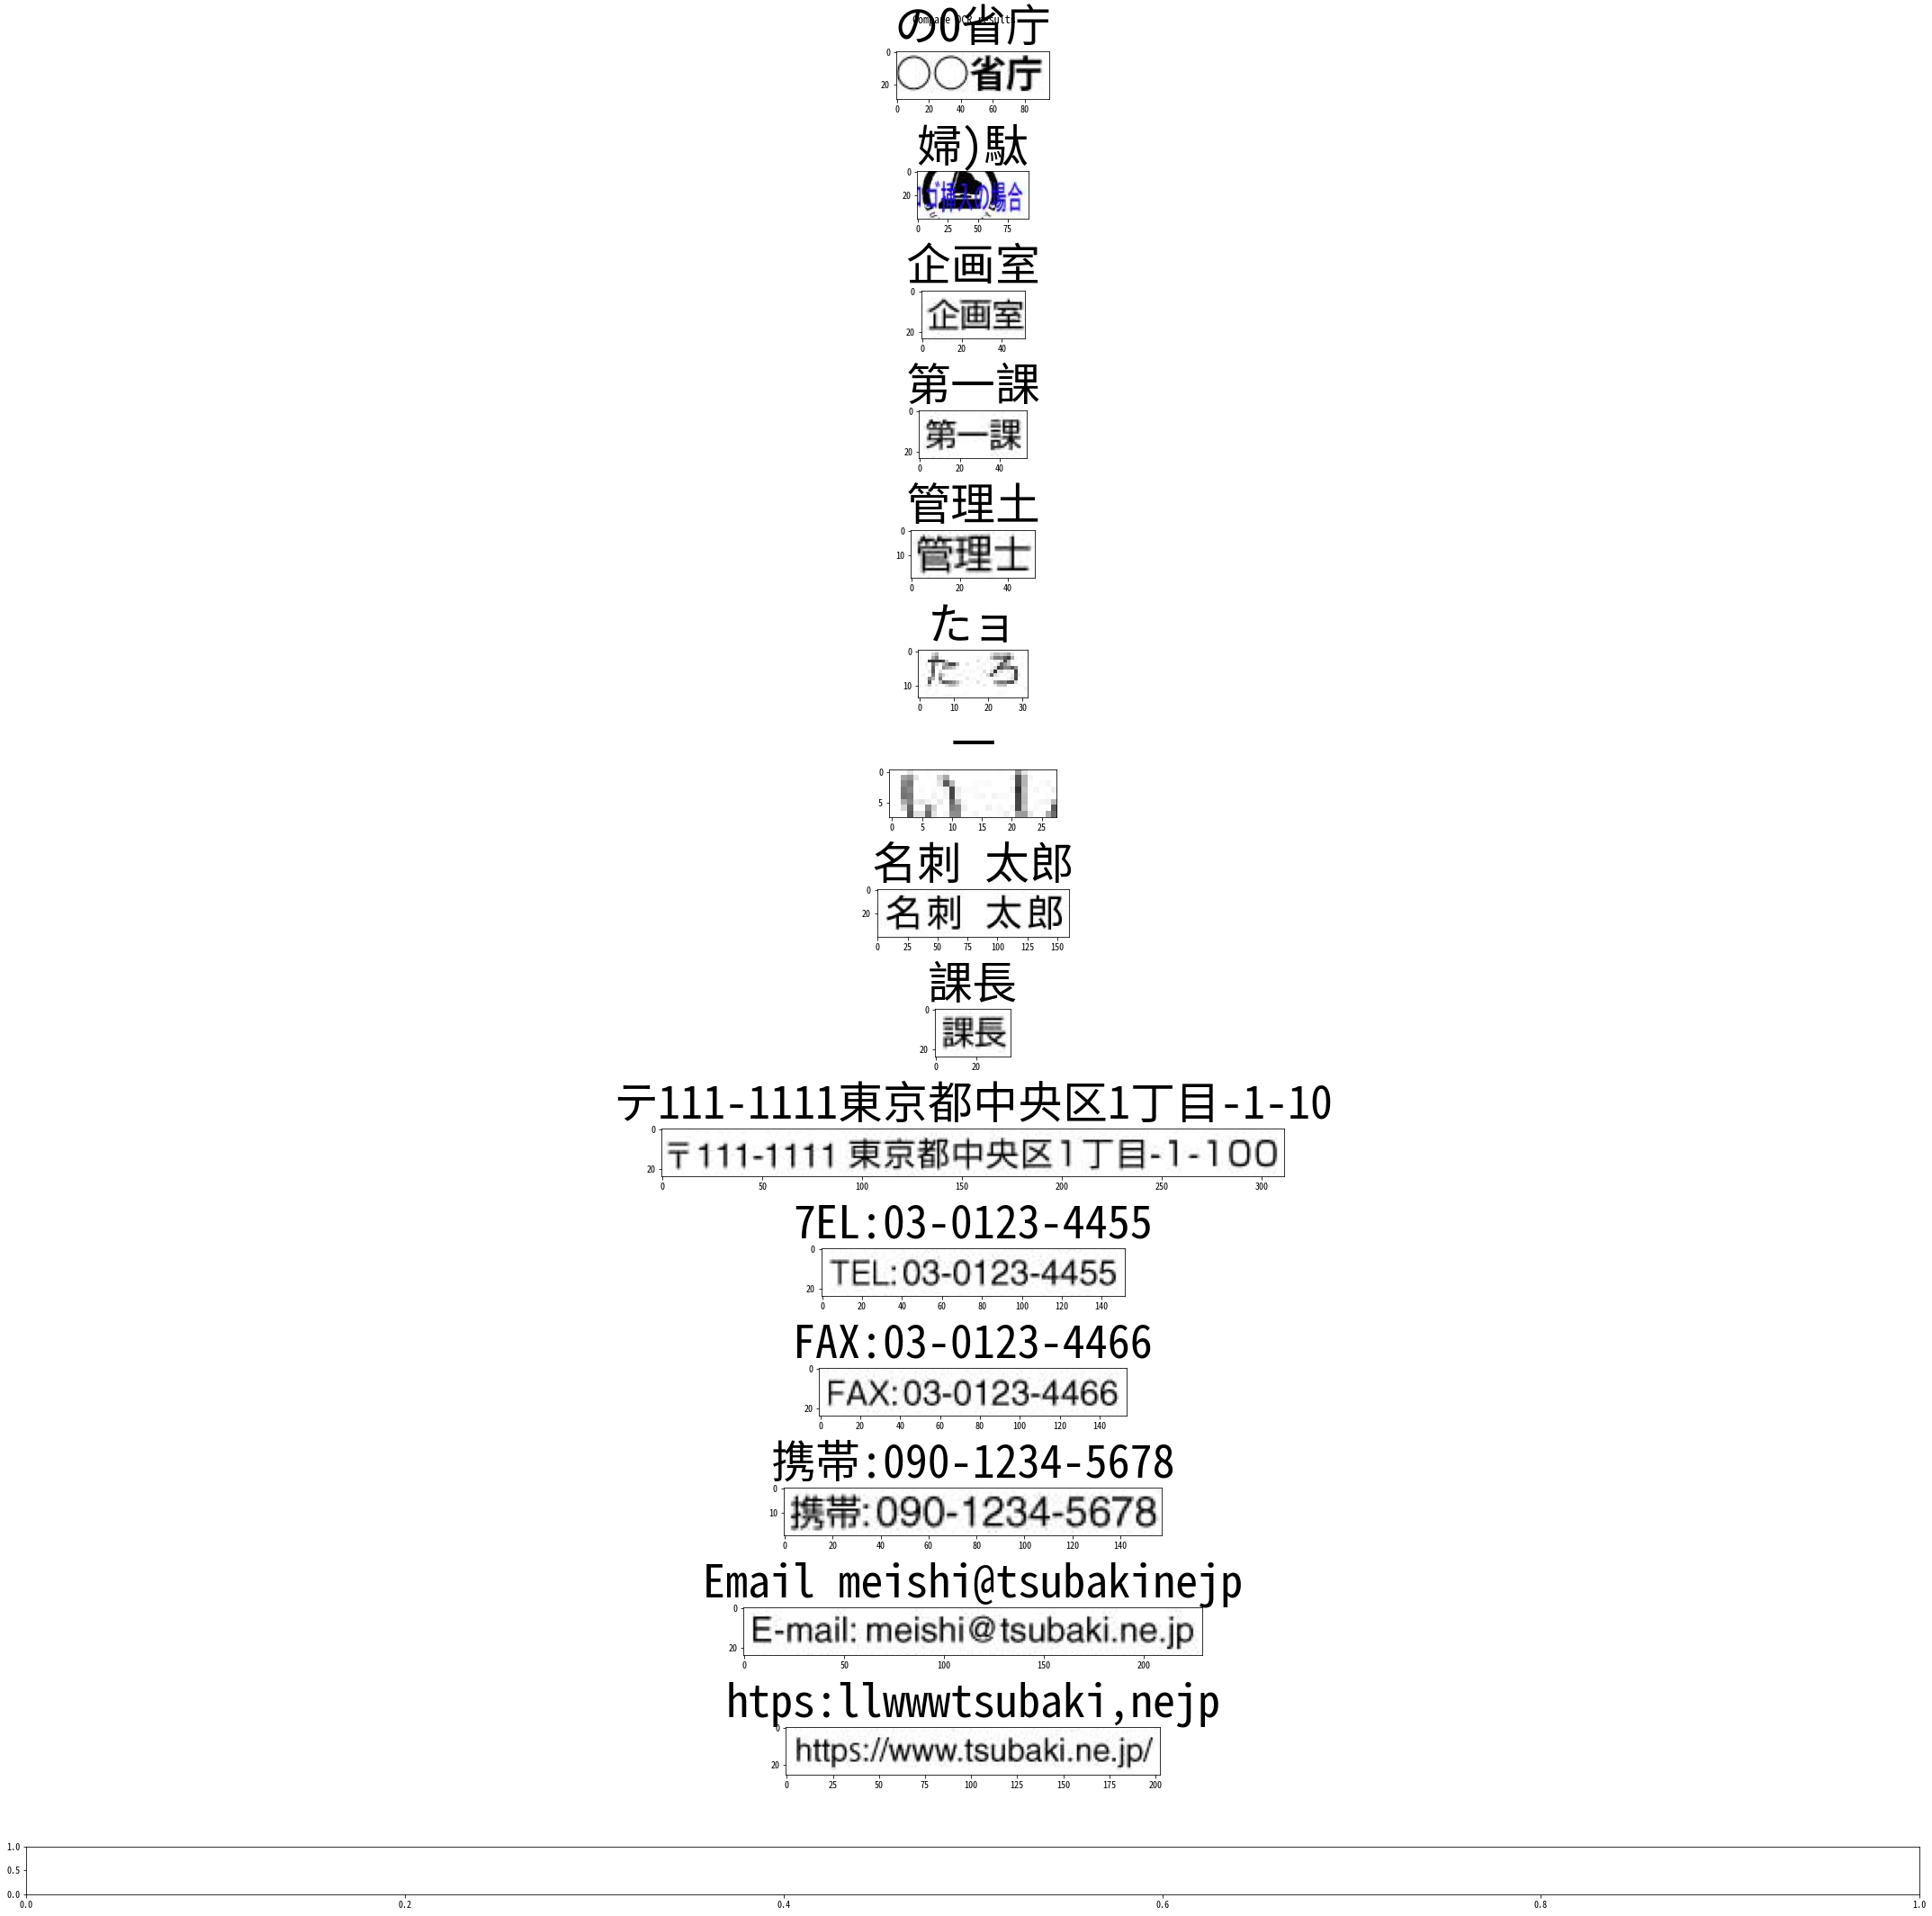

In [64]:
fig, ax = plt.subplots(len(res), figsize=(30,30))
fig.suptitle("Compare OCR results")

for index, detect in enumerate(result):
    
    pos = detect[0]    
    x1, x2, y1, y2 = pos[0][0], pos[1][0], pos[0][1], pos[2][1]
    crop_img = out[y1:y2, x1:x2]
    ax[index].imshow(crop_img)
    
    text = detect[1]
    ax[index].set_title(text, fontsize=50)
    
# plt.show()
plt.tight_layout() #This avoid overlapping of the title and the image

The result is not perfect, but it's better than tesseract!